In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize= (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

In [34]:
sep_coins = cv2.imread("D:\\YEDEK\\Belgeler\\WS\\Python\\Computer Vision Course\Computer-Vision-with-Python\\Computer-Vision-with-Python\\DATA\\pennies.jpg")

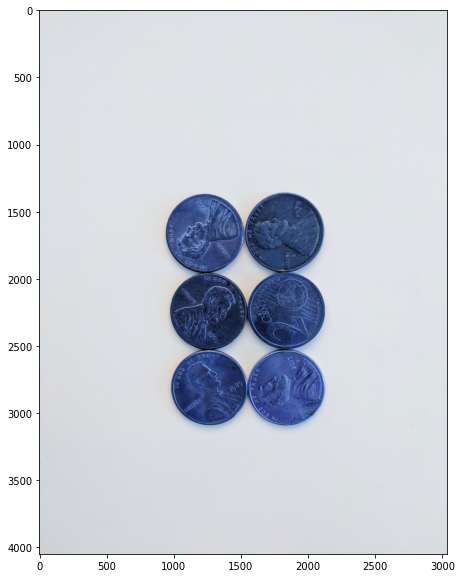

In [35]:
display(sep_coins)

In [36]:
# FIND SEGMENTATION WITH CONVENSIONAL ALGORITHMS
sep_blur = cv2.medianBlur(sep_coins, 25)

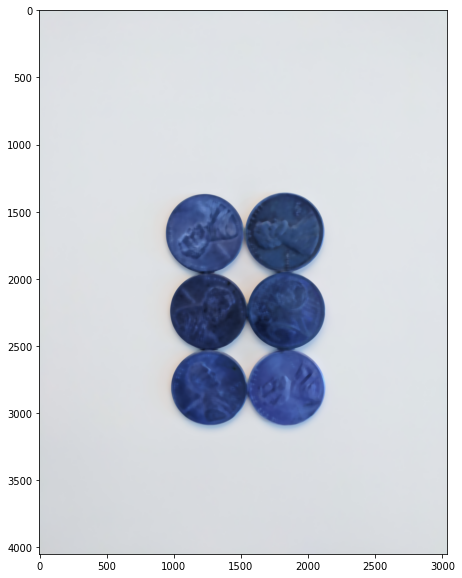

In [38]:
display(sep_blur)

In [39]:
sep_gray = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

In [40]:
ret, sep_thresh = cv2.threshold(sep_gray, 160, 255, cv2.THRESH_BINARY_INV)

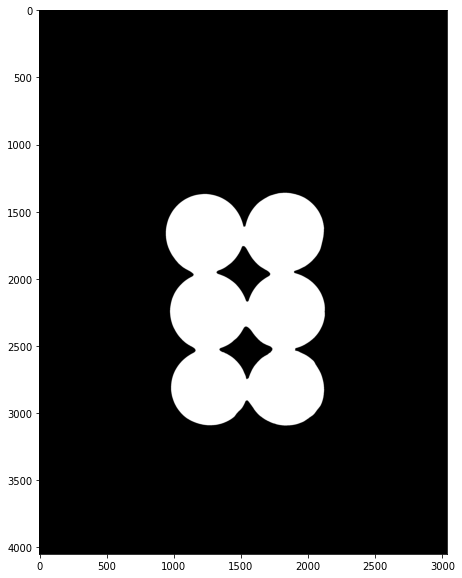

In [41]:
display(sep_thresh)

In [42]:
sep_thresh_cp =sep_thresh.copy()
contours, hierarcy = cv2.findContours(sep_thresh_cp, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [45]:
for i in range(len(contours)):
    if hierarcy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

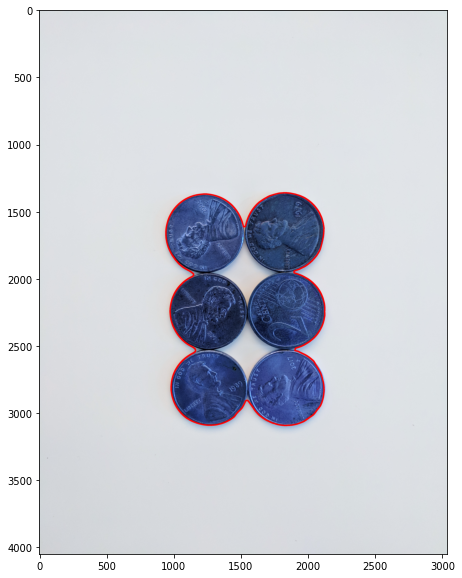

In [46]:
display(sep_coins)

In [47]:
#WATERSHED ALGORITHM
coin_img = cv2.imread("D:\\YEDEK\\Belgeler\\WS\\Python\\Computer Vision Course\Computer-Vision-with-Python\\Computer-Vision-with-Python\\DATA\\pennies.jpg")

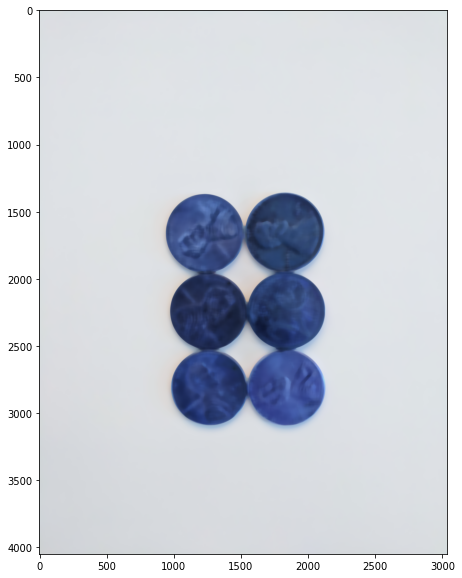

In [48]:
coin_img = cv2.medianBlur(coin_img, 35)
display(coin_img)

In [49]:
gray_coin = cv2.cvtColor(coin_img, cv2.COLOR_BGR2GRAY)

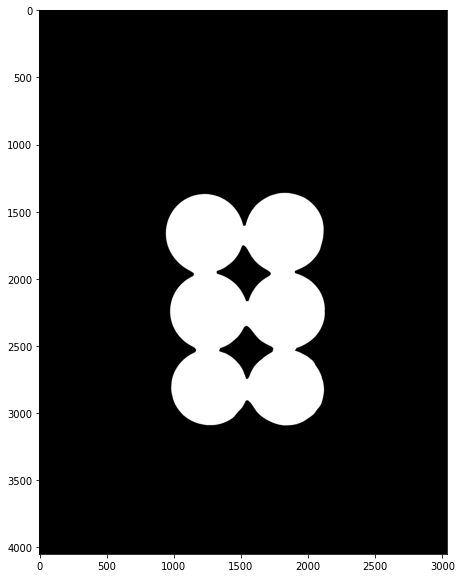

In [50]:
ret, thresh_coin = cv2.threshold(gray_coin, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) # Here we used otsu thresholding which works really well with watershed algorithm
display(thresh_coin)

In [51]:
#noise removal
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

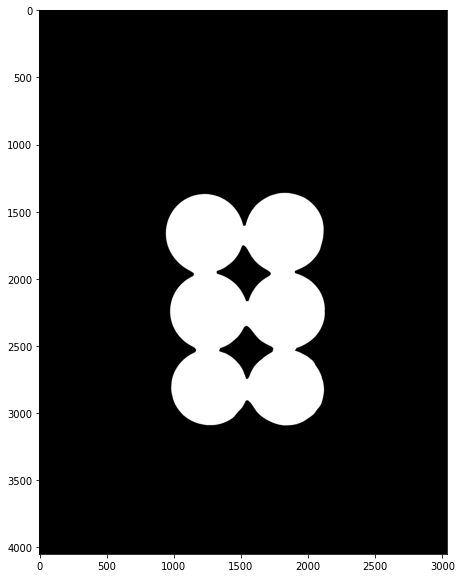

In [52]:
opening = cv2.morphologyEx(thresh_coin, cv2.MORPH_OPEN, kernel, iterations= 2)
display(opening) #image is simle so not much of a difference

In [53]:
#applying distance transform to soften changes
coin_dist = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

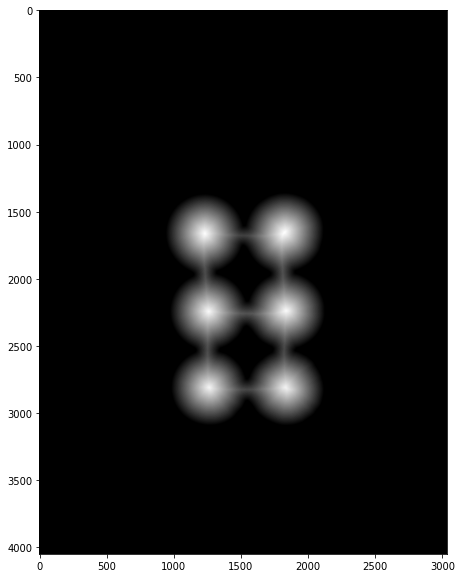

In [54]:
display(coin_dist)

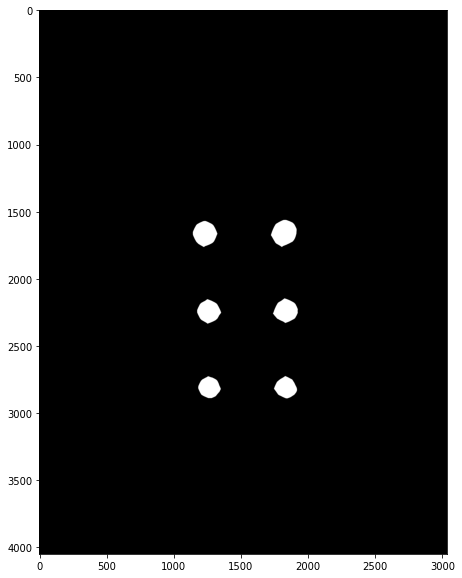

In [55]:
ret, sure_fg = cv2.threshold(coin_dist, 0.7 * coin_dist.max(), 255, 0) #we apply thresholding to distance transformed image to emphasize segments
display(sure_fg)

In [56]:
sure_fg = np.uint8(sure_fg)

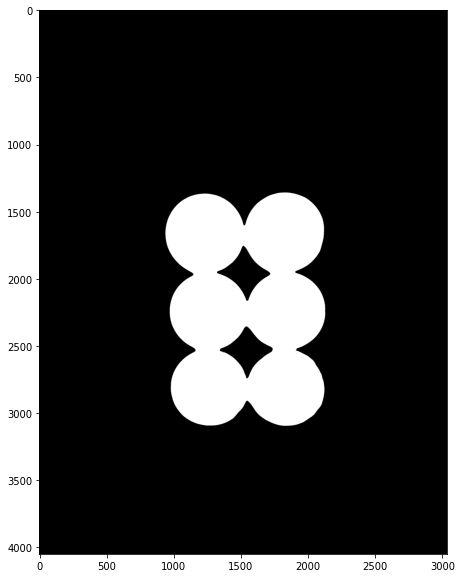

In [57]:
sure_bg = cv2.dilate(opening, kernel, iterations= 3)
display(sure_bg)

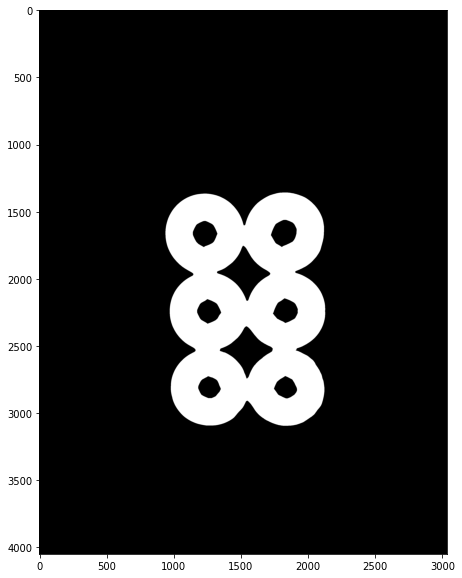

In [59]:
unknown = cv2.subtract(sure_bg, sure_fg) 
#substraction foreground from background to extract
#uncertain areas (if it belongs to background or foreground)
display(unknown)

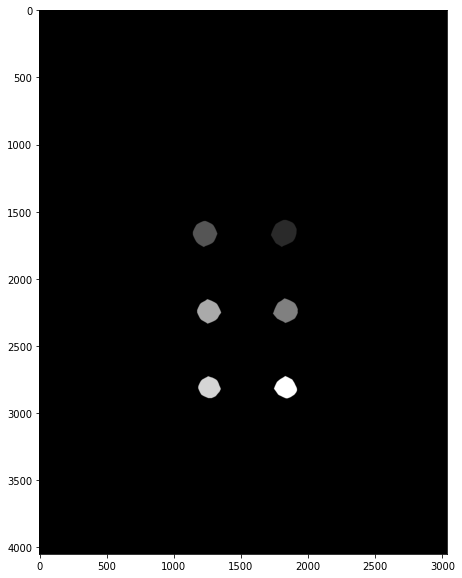

In [70]:
ret, markers = cv2.connectedComponents(sure_fg) #creates a label map of the segments so watershed can distinguish them one another
display(markers)

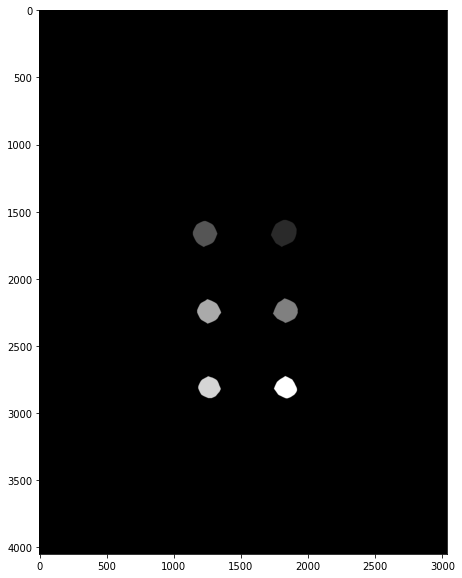

In [71]:
markers += 1 #adding 1 to all image so background is not pitch black and distinguishible from unknown segment
display(markers)

In [72]:
markers[unknown == 255] = 0 #masking pixels black where they are white in unknown

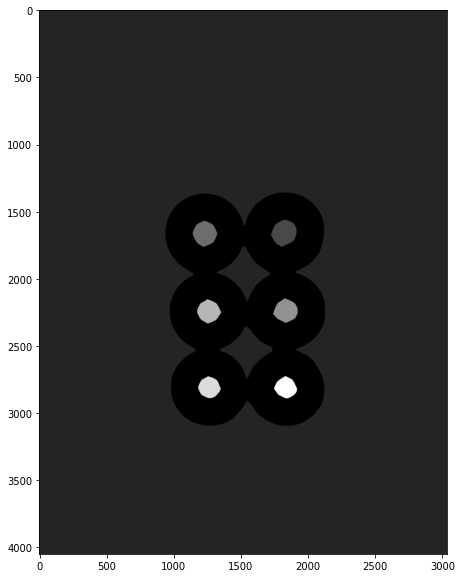

In [73]:
display(markers)

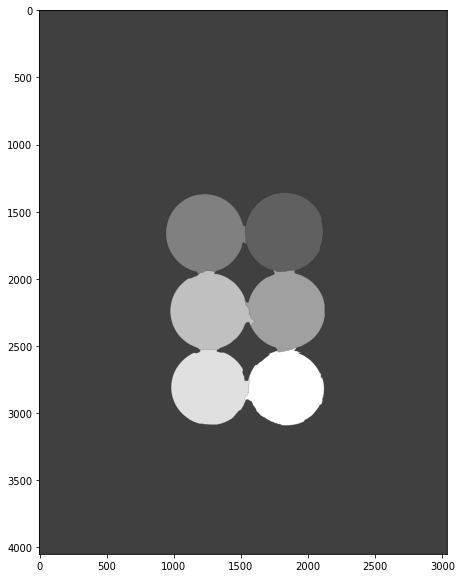

In [79]:
markers = cv2.watershed(coin_img, markers)
display(markers)

In [85]:
markers_cp = markers.copy()
contours, hierarcy = cv2.findContours(markers_cp, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [86]:
for i in range(len(contours)):
    if hierarcy[0][i][3] == -1:
        cv2.drawContours(coin_img, contours, i, (255, 0, 0), 10)

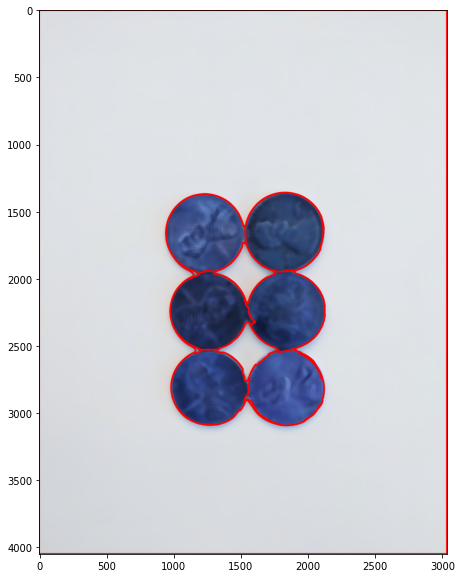

In [87]:
display(coin_img) #we successfully segmented each coin!